In [88]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [89]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]

In [90]:
subjects

['BL49Fam',
 'BL53Control',
 'BL45Control',
 'BL51Control',
 'BL48Unfam',
 'BL47Fam',
 'BL54Unfam',
 'BL50Fam',
 'BL52Unfam',
 'BL46Unfam']

In [91]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [92]:
def load_subject(subject, data_directory, threshold):
    file_suffix = 'cells_' + str(threshold)
    df_mouse = pd.read_csv(data_directory + subject + '/' + file_suffix + '.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    
    return df_mouse

# Analysis on Black with father Whole Brain

In [93]:
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject=subject, 
                                                                                               data_directory=data_directory,
                                                                                              threshold=1500), 
                                                                         vol=volumes, 
                                                                         level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_Black_wf_WholeBrain1500.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/py

In [94]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain1500.npy', 
                                   allow_pickle=True).item()

In [95]:
subjects = list(dict_results_across_mice.keys())
subjects

['BL49Fam',
 'BL53Control',
 'BL45Control',
 'BL51Control',
 'BL48Unfam',
 'BL47Fam',
 'BL54Unfam',
 'BL50Fam',
 'BL52Unfam',
 'BL46Unfam']

# List areas with null cell count

In [96]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

# List areas with no volume

In [97]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [98]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['BL53Control', 'BL45Control', 'BL51Control'],
 'Fam': ['BL49Fam', 'BL47Fam', 'BL50Fam'],
 'Unfam': ['BL48Unfam', 'BL54Unfam', 'BL52Unfam', 'BL46Unfam']}

# Calculate cell count across experimental groups

In [99]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [100]:
df_control_cell_count.set_index('area').sum()

BL53Control    245676
BL45Control    407761
BL51Control    423474
dtype: int64

In [101]:
df_fam_cell_count.set_index('area').sum()

BL49Fam    293348
BL47Fam    393215
BL50Fam    355229
dtype: int64

In [102]:
df_unfam_cell_count.set_index('area').sum()

BL48Unfam    337923
BL54Unfam    270180
BL52Unfam    194416
BL46Unfam    188415
dtype: int64

# Look at cell count per area

In [103]:
df_control_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL53Control    1141
BL45Control    2084
BL51Control    2388
Name: Medial amygdalar nucleus, dtype: int64

In [104]:
df_fam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL49Fam    5352
BL47Fam    5015
BL50Fam    4828
Name: Medial amygdalar nucleus, dtype: int64

In [105]:
df_unfam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL48Unfam    2685
BL54Unfam    2682
BL52Unfam    1334
BL46Unfam    1823
Name: Medial amygdalar nucleus, dtype: int64

In [106]:
df_control_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL53Control    55
BL45Control    40
BL51Control    31
Name: Ventral premammillary nucleus, dtype: int64

In [107]:
df_fam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL49Fam    913
BL47Fam    730
BL50Fam    600
Name: Ventral premammillary nucleus, dtype: int64

In [108]:
df_unfam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL48Unfam    360
BL54Unfam    391
BL52Unfam    334
BL46Unfam    179
Name: Ventral premammillary nucleus, dtype: int64

In [109]:
df_control_cell_count.set_index('area').loc['Main olfactory bulb']

BL53Control     7145
BL45Control    10673
BL51Control    18879
Name: Main olfactory bulb, dtype: int64

In [110]:
df_fam_cell_count.set_index('area').loc['Main olfactory bulb']

BL49Fam    19303
BL47Fam    21314
BL50Fam    11168
Name: Main olfactory bulb, dtype: int64

In [111]:
df_unfam_cell_count.set_index('area').loc['Main olfactory bulb']

BL48Unfam     8000
BL54Unfam    13249
BL52Unfam    15616
BL46Unfam    21546
Name: Main olfactory bulb, dtype: int64

In [112]:
df_control_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL53Control     236
BL45Control     448
BL51Control    1172
Name: Accessory olfactory bulb, dtype: int64

In [113]:
df_fam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL49Fam    875
BL47Fam    677
BL50Fam    704
Name: Accessory olfactory bulb, dtype: int64

In [114]:
df_unfam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL48Unfam     245
BL54Unfam     429
BL52Unfam     333
BL46Unfam    1621
Name: Accessory olfactory bulb, dtype: int64

## Calculate t-tests across groups per area

In [115]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])

In [116]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [117]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:15].set_index('area')

,pval_Control_vs_Fam
area,
Medial amygdalar nucleus,0.00140444
Ventral premammillary nucleus,0.00149364
Posterior amygdalar nucleus,0.00282613
Cortical amygdalar area,0.00435368
Piriform-amygdalar area,0.0103506
Tuberomammillary nucleus,0.010421
Arcuate hypothalamic nucleus,0.0134874
Posterodorsal preoptic nucleus,0.0248962
Periventricular hypothalamic nucleus posterior part,0.0260162


In [118]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Fam    0.227768
Name: Supramammillary nucleus, dtype: object

In [119]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,0.00452659
Lateral habenula,0.0100098
Central lateral nucleus of the thalamus,0.0125313
Taenia tecta,0.0126071
Parafascicular nucleus,0.0175979
Rostral linear nucleus raphe,0.0227593
Ventral tegmental area,0.0276225
Anterior olfactory nucleus,0.0293268
Nucleus accumbens,0.0325171


In [120]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Unfam    0.382838
Name: Supramammillary nucleus, dtype: object

In [121]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:40].set_index('area')

,pval_Fam_vs_Unfam
area,
Medial amygdalar nucleus,0.000883171
Cortical amygdalar area,0.00409062
Intercalated amygdalar nucleus,0.00449426
Paraventricular nucleus of the thalamus,0.00479734
Ventrolateral preoptic nucleus,0.00496662
Ventral premammillary nucleus,0.00594186
Midbrain reticular nucleus,0.00615533
Posterior amygdalar nucleus,0.00706527
Posterolateral visual area,0.00834769


In [122]:
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Fam_vs_Unfam    0.0363513
Name: Supramammillary nucleus, dtype: object

## Calculate cross corr across groups per area on cell count

In [123]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)

In [124]:
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)

In [125]:
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

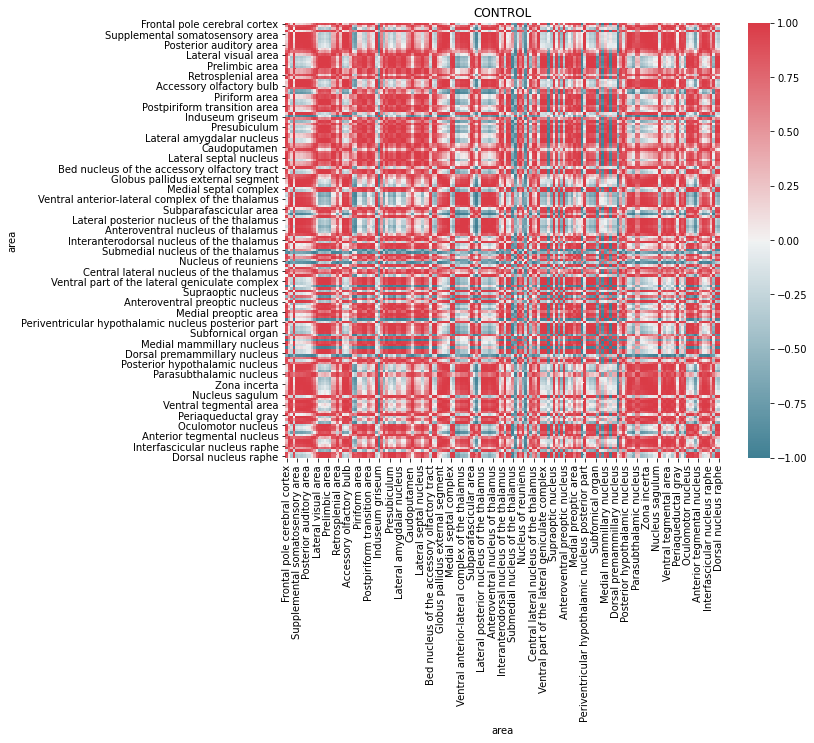

In [126]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

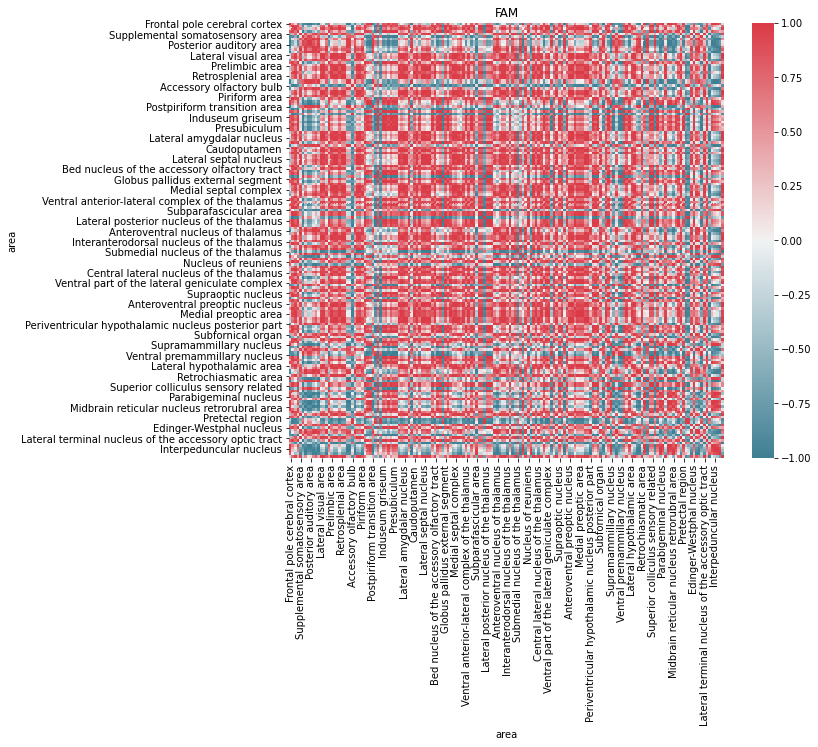

In [127]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

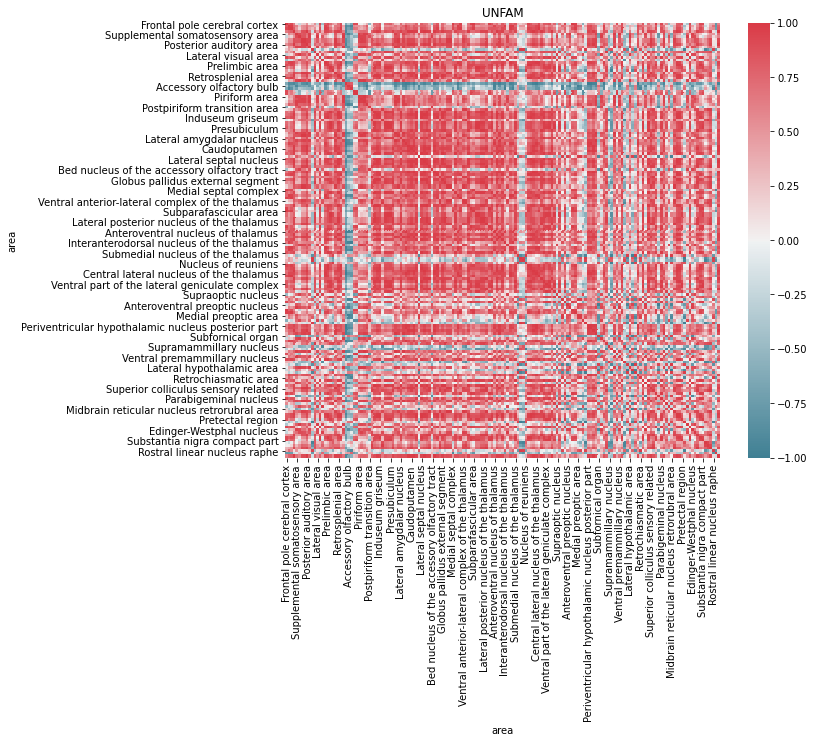

In [128]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [129]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

## T-test on energy across groups

In [130]:
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])

In [131]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [132]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:10].set_index('area')

,pval_Control_vs_Fam
area,
Cortical amygdalar area,0.000853506
Piriform-amygdalar area,0.00214134
Medial amygdalar nucleus,0.00329034
Posterior amygdalar nucleus,0.00376399
Ventral premammillary nucleus,0.00725362
Intercalated amygdalar nucleus,0.0227629
Periventricular hypothalamic nucleus posterior part,0.0285123
Posterodorsal preoptic nucleus,0.0473055
Tuberomammillary nucleus,0.0499566


In [133]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,0.00670328
Subthalamic nucleus,0.00805921
Vascular organ of the lamina terminalis,0.0109167
Orbital area,0.0138392
Anterior olfactory nucleus,0.0169964
Taenia tecta,0.0196254
Lateral posterior nucleus of the thalamus,0.0220348
Nucleus accumbens,0.0223938
Parafascicular nucleus,0.0253387


In [134]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Cortical amygdalar area,0.00017847
Intercalated amygdalar nucleus,0.000717985
Medial amygdalar nucleus,0.0011505
Posterior amygdalar nucleus,0.00207191
Piriform-amygdalar area,0.00360527
Midbrain reticular nucleus,0.00516427
Basomedial amygdalar nucleus,0.00555967
Arcuate hypothalamic nucleus,0.0086041
Ventral premammillary nucleus,0.0101731


In [135]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)

In [136]:
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)

In [137]:
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

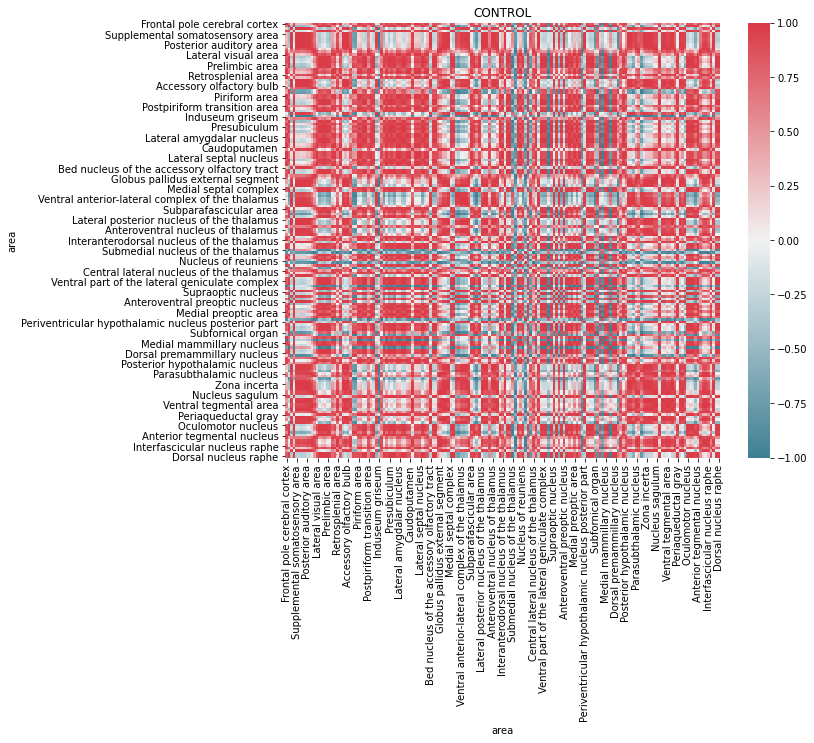

In [138]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

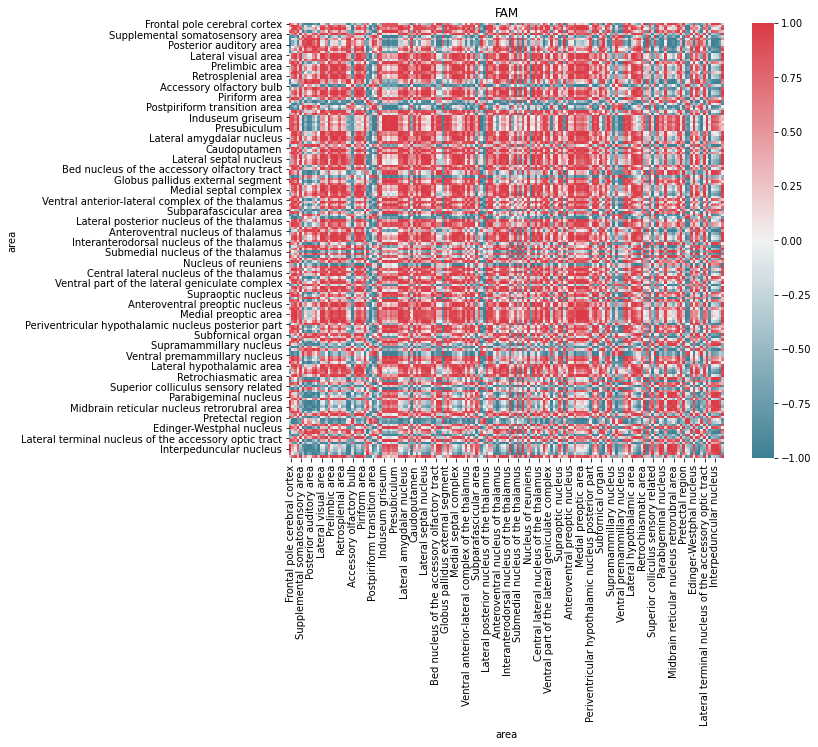

In [139]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

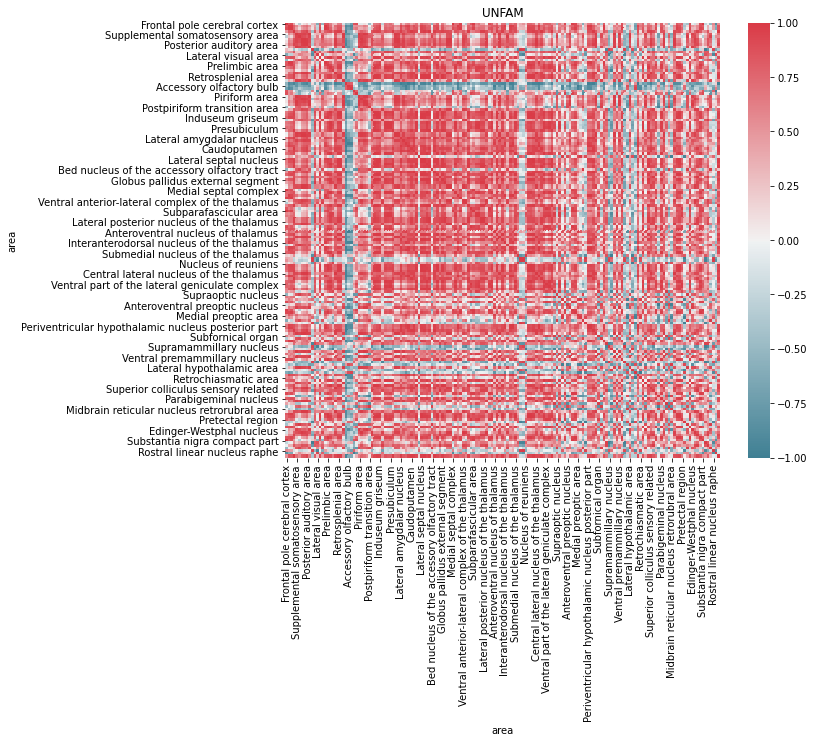

In [140]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate relative density

In [141]:
df_control_rd, df_fam_rd, df_unfam_rd = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='relative_density')

In [142]:
df_ttest_rd = ace.test_across_groups([df_control_rd,df_fam_rd,df_unfam_rd])

In [143]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_rd = df_ttest_rd.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [144]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Posterior amygdalar nucleus,0.00356519
Cortical amygdalar area,0.00406251
Medial amygdalar nucleus,0.00493048
Parafascicular nucleus,0.00507942
Posterodorsal preoptic nucleus,0.00628699
Piriform-amygdalar area,0.00915615
Ventral premammillary nucleus,0.00985774
Basomedial amygdalar nucleus,0.0101476
Parasubthalamic nucleus,0.0113479


In [145]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,7.60333e-05
Central lateral nucleus of the thalamus,0.000666725
Ventral premammillary nucleus,0.00276718
Parafascicular nucleus,0.00369863
Nucleus accumbens,0.00567155
Cortical amygdalar area,0.0089465
Medial amygdalar nucleus,0.0116526
Periventricular hypothalamic nucleus posterior part,0.0132816
Lateral posterior nucleus of the thalamus,0.0176274


In [146]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Intercalated amygdalar nucleus,0.00660387
Parasubthalamic nucleus,0.013101
Medial amygdalar nucleus,0.0132674
Dorsomedial nucleus of the hypothalamus,0.0239148
Anterodorsal nucleus,0.0251752
Trochlear nucleus,0.0269594
Ventrolateral preoptic nucleus,0.0288
Subparaventricular zone,0.0366013
Globus pallidus internal segment,0.0406836
